In [8]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [9]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CONSUMPTION,DOMINV,REXP,RIMP,output
0,9609.642914,2367.003360,1218.779326,1898.251033,14336.797452
1,9658.284427,2307.639723,1254.689459,1909.823607,14371.885546
2,9725.922028,2400.743777,1258.105547,1938.074173,14508.884543
3,9780.055098,2300.662207,1241.126925,1985.154333,14451.803233
4,9828.261164,2383.149310,1236.330006,2026.600707,14536.060765
5,9670.189977,2296.067720,1238.083116,2062.779517,14217.215518
6,9719.171573,2400.112333,1272.547456,2066.500733,14381.319469
7,9787.282350,2341.845097,1276.964353,2087.185150,14415.888464
8,9841.794357,2308.929027,1260.609548,2094.980823,14449.334954
9,9890.338043,2395.751660,1254.729167,2126.085790,14548.347997


In [10]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

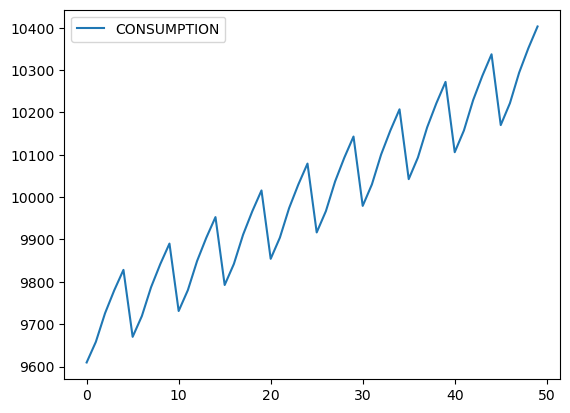

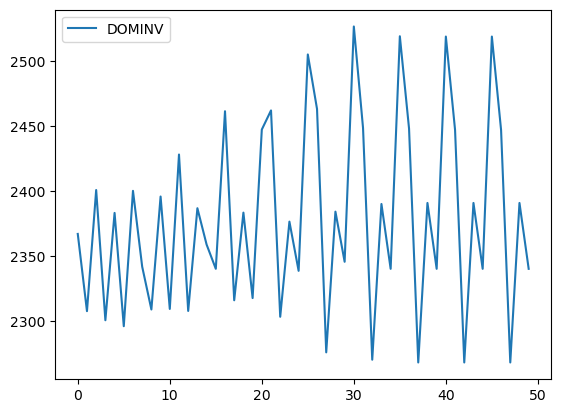

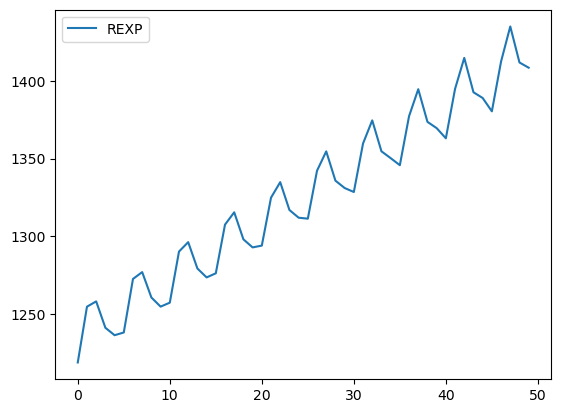

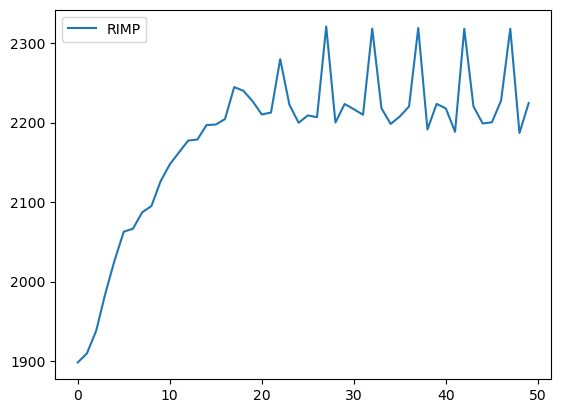

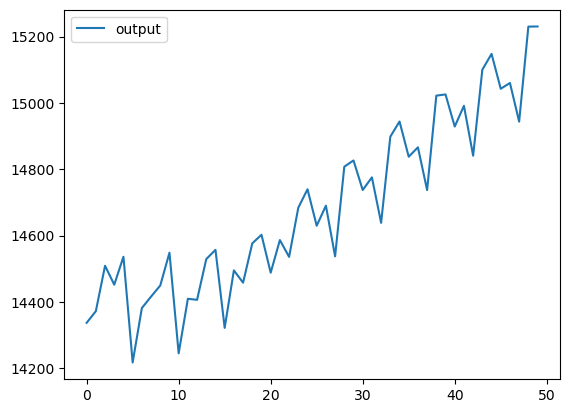

<Figure size 640x480 with 0 Axes>

In [11]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

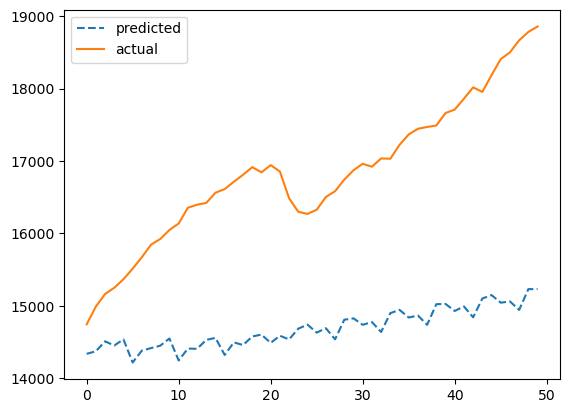

In [12]:
pred = df['output']
act = act.iloc[5:55].reset_index(drop=True)

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [13]:
r2_score(act, pred)

-4.376478337874842

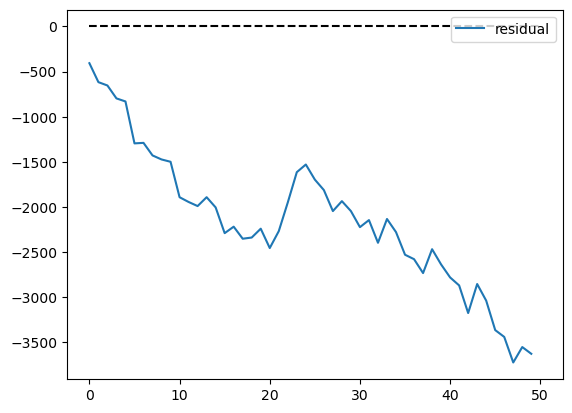

In [14]:
(pred - act['RGDP']).plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()